In [96]:
my_factor = ["DEP", "ED", "PI", "MHP", "GDP", "NOI"]
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

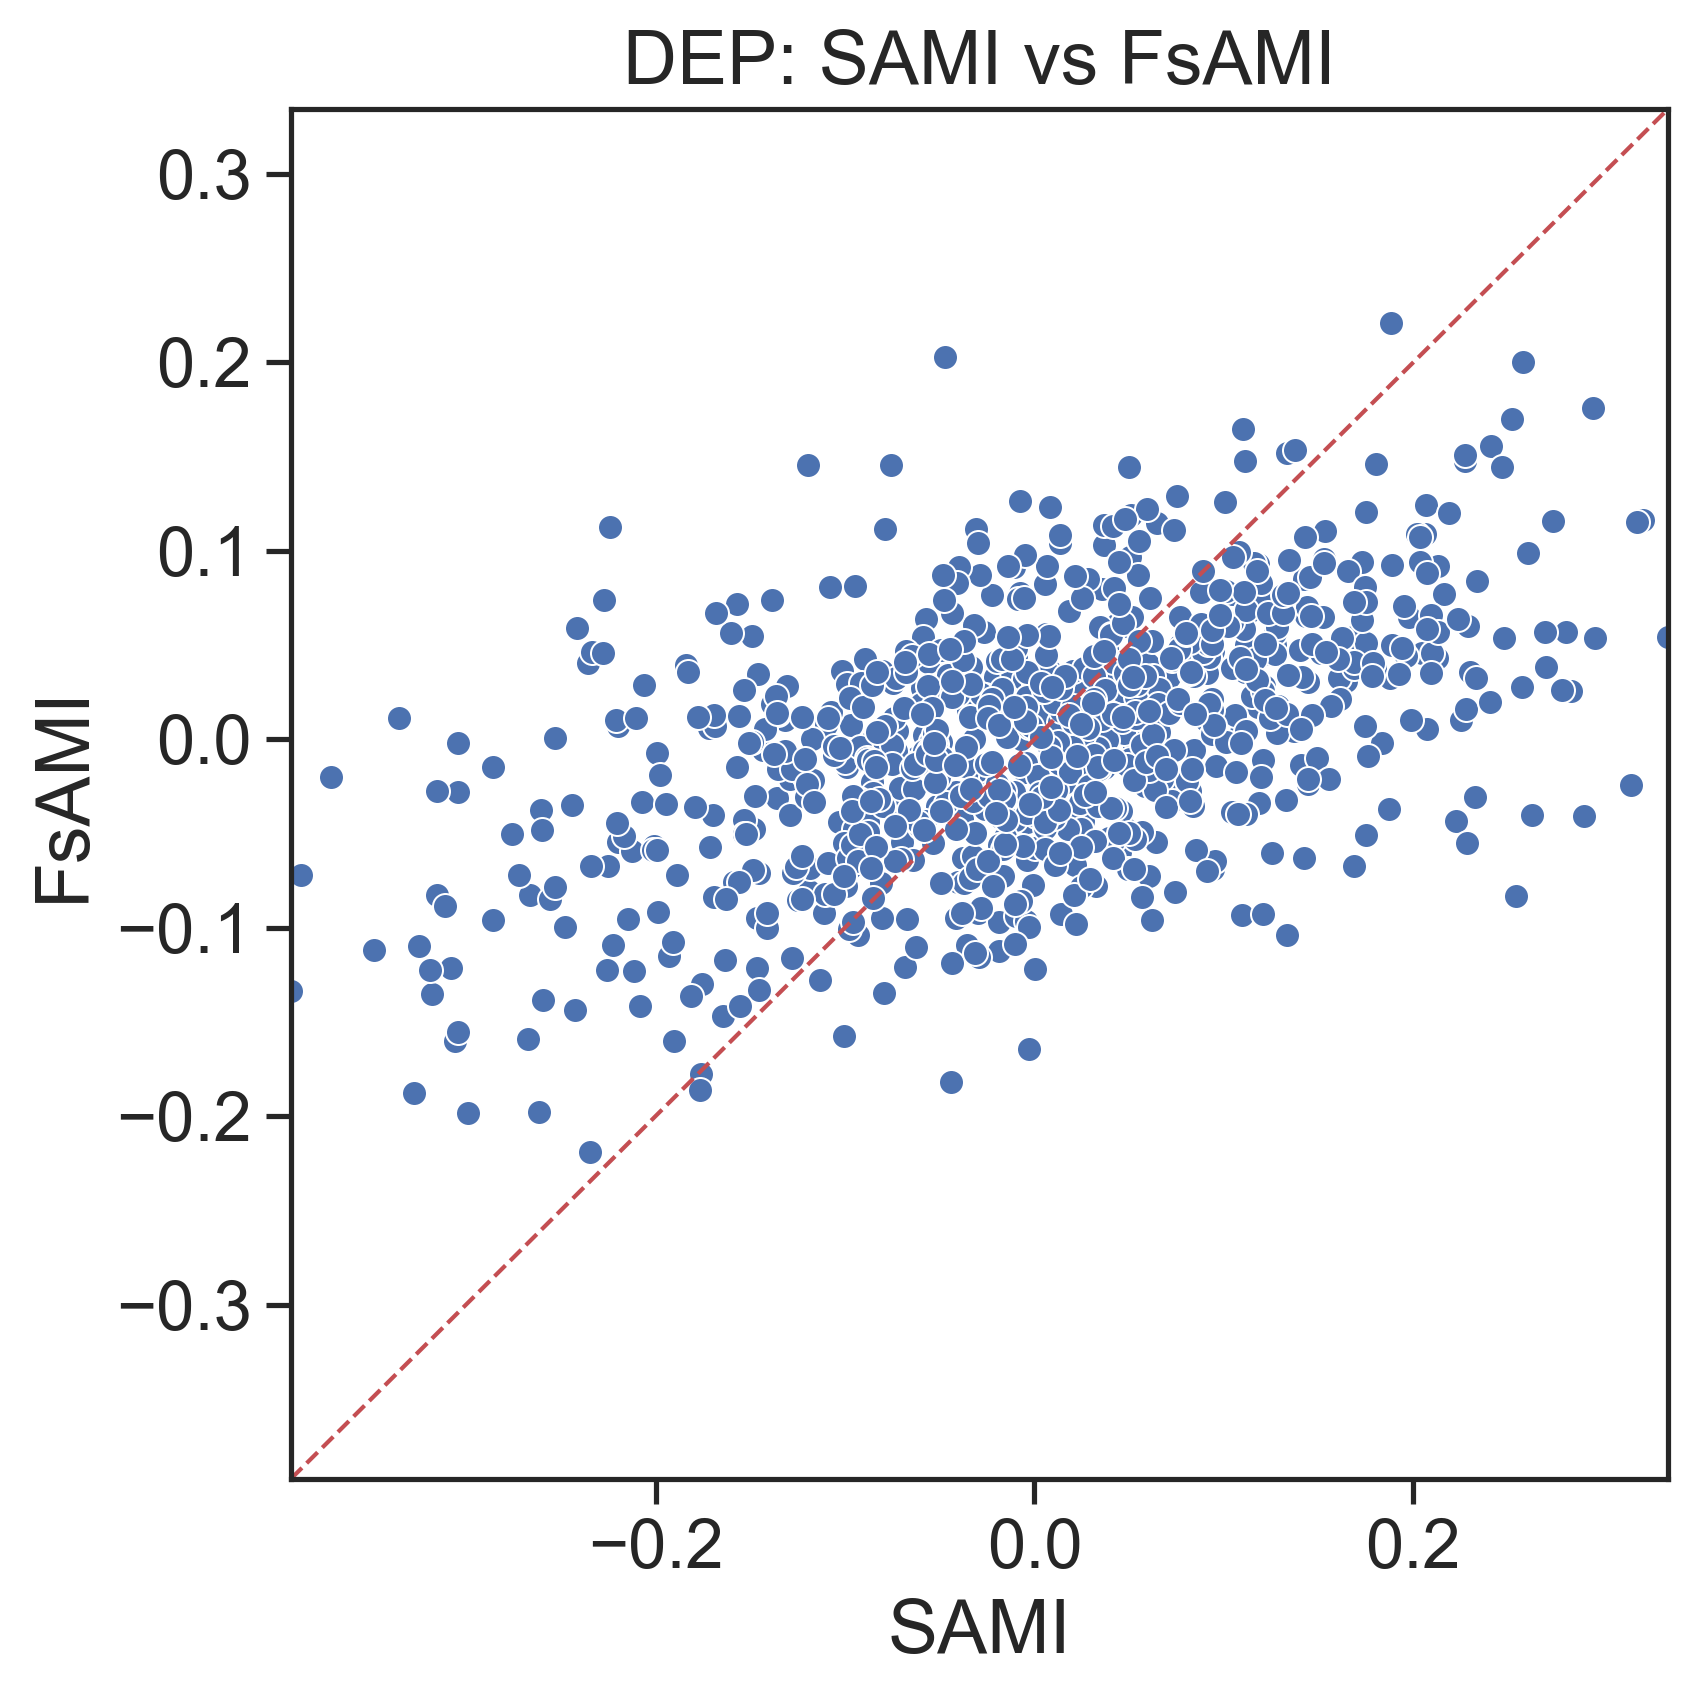

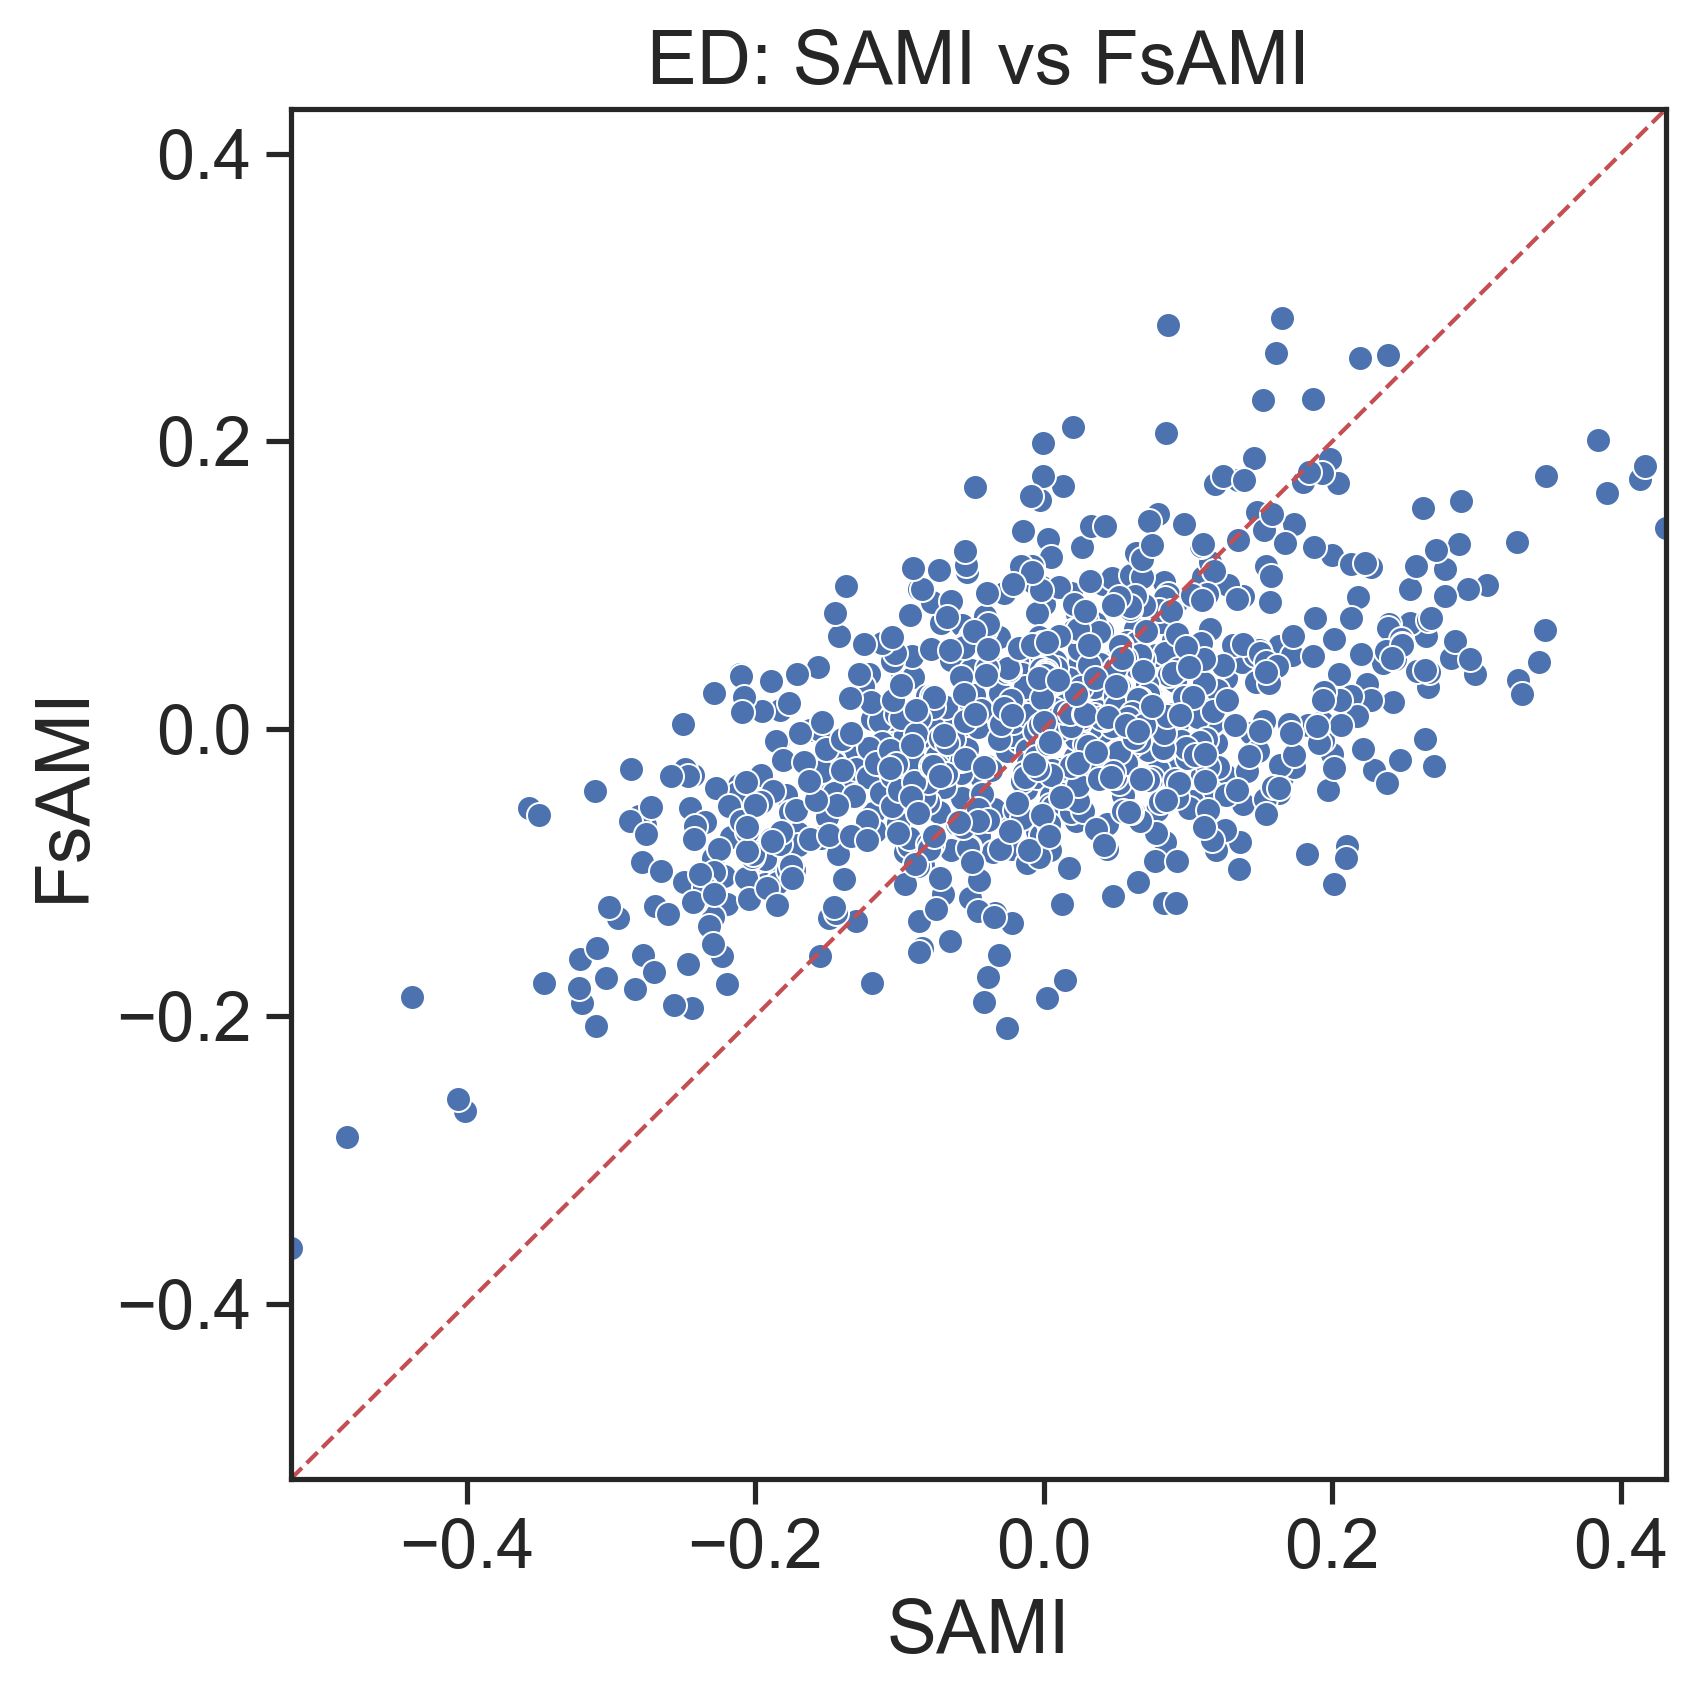

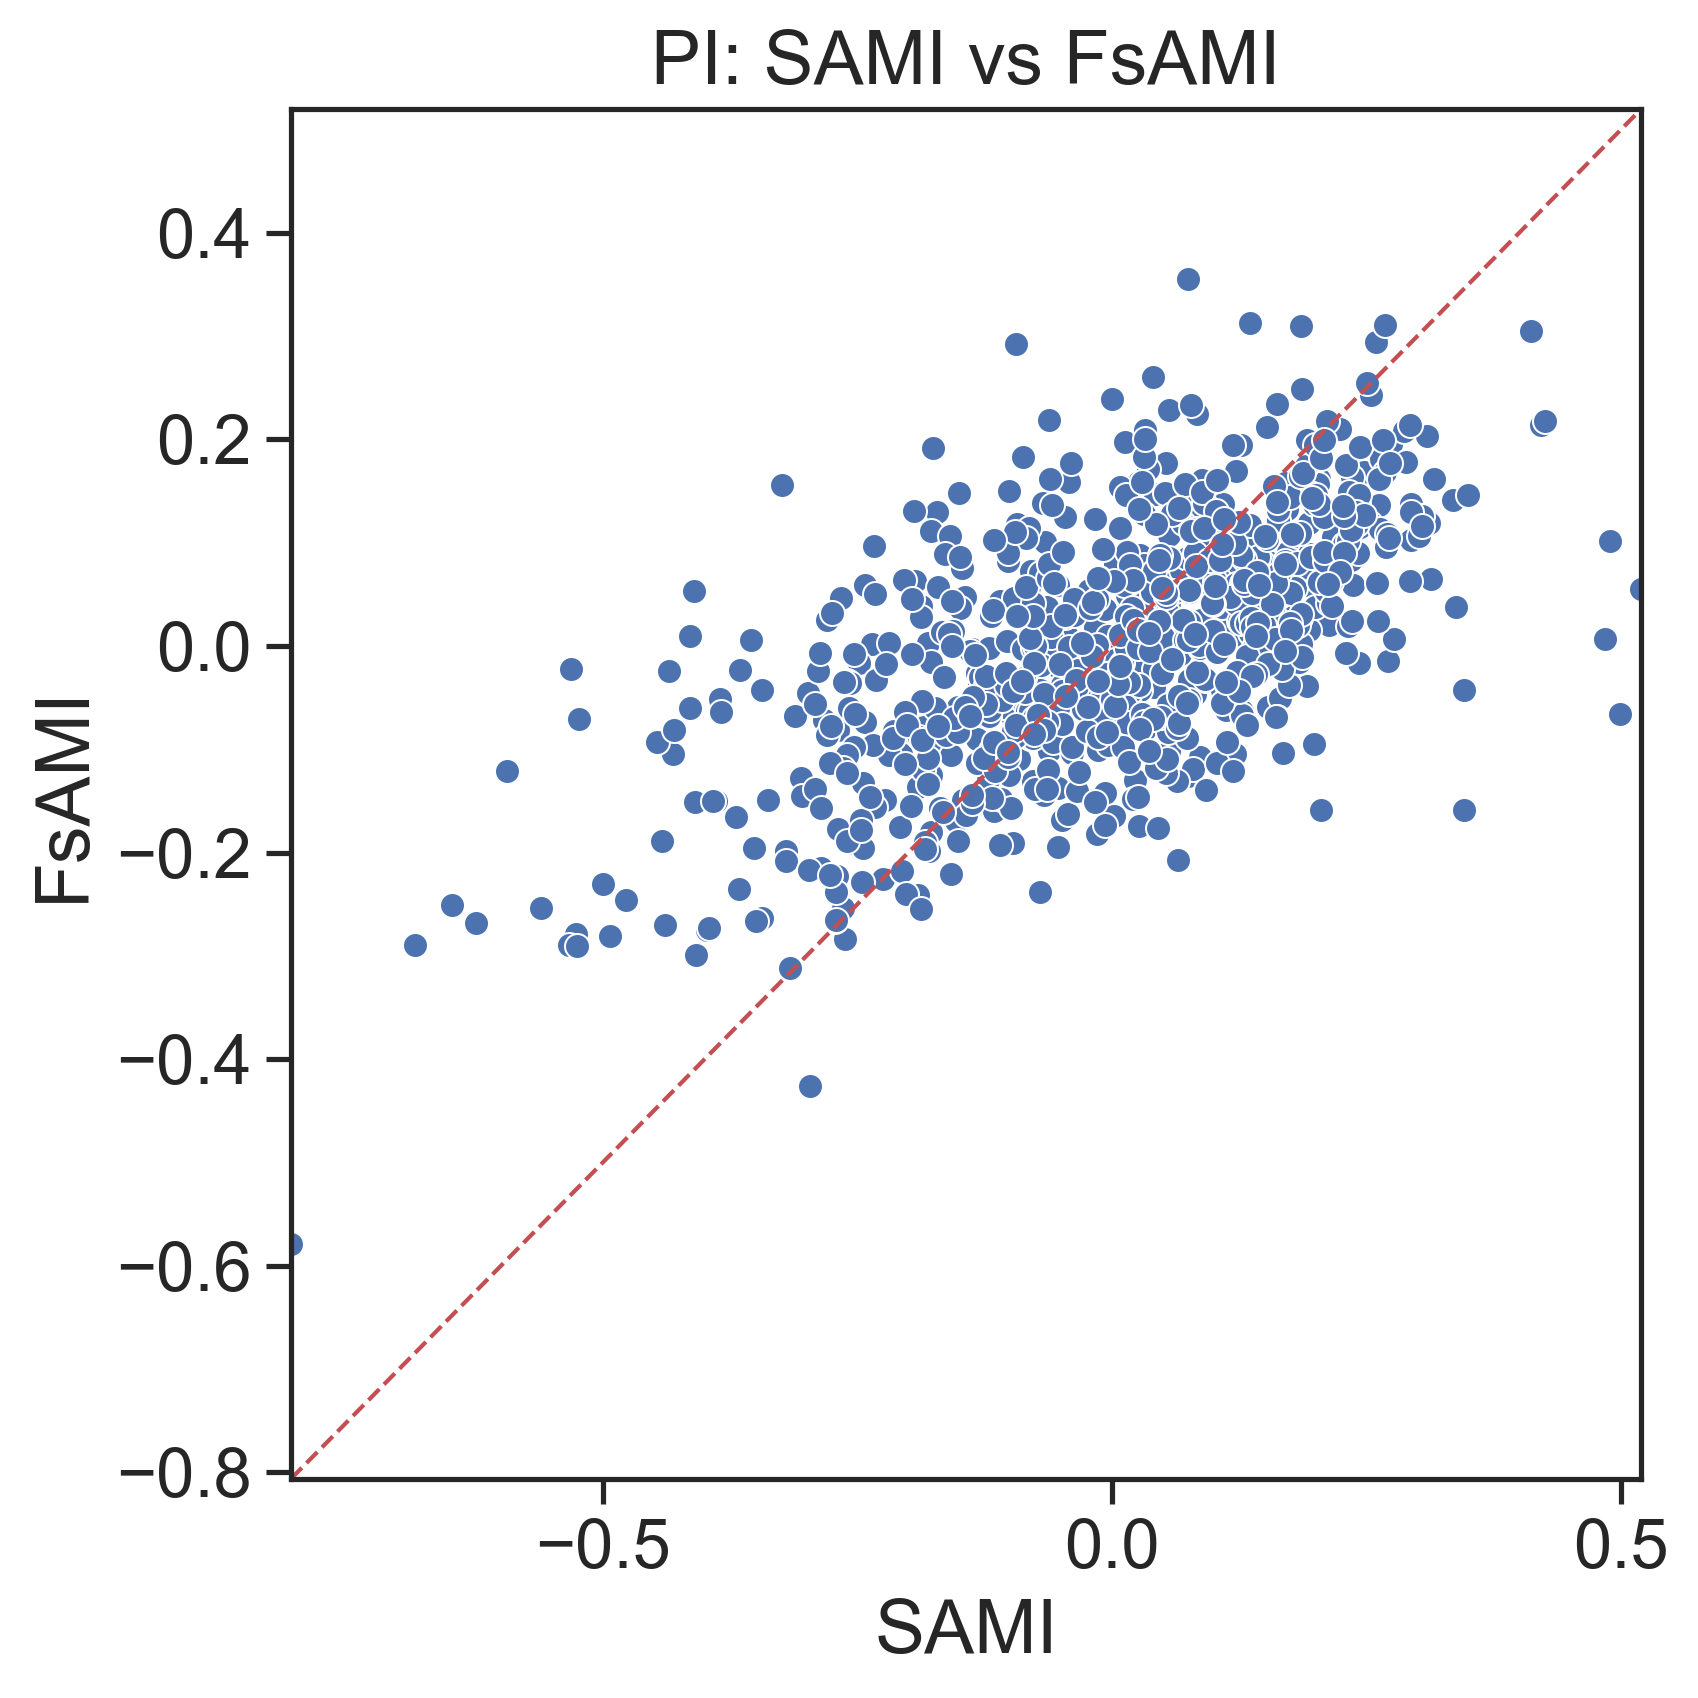

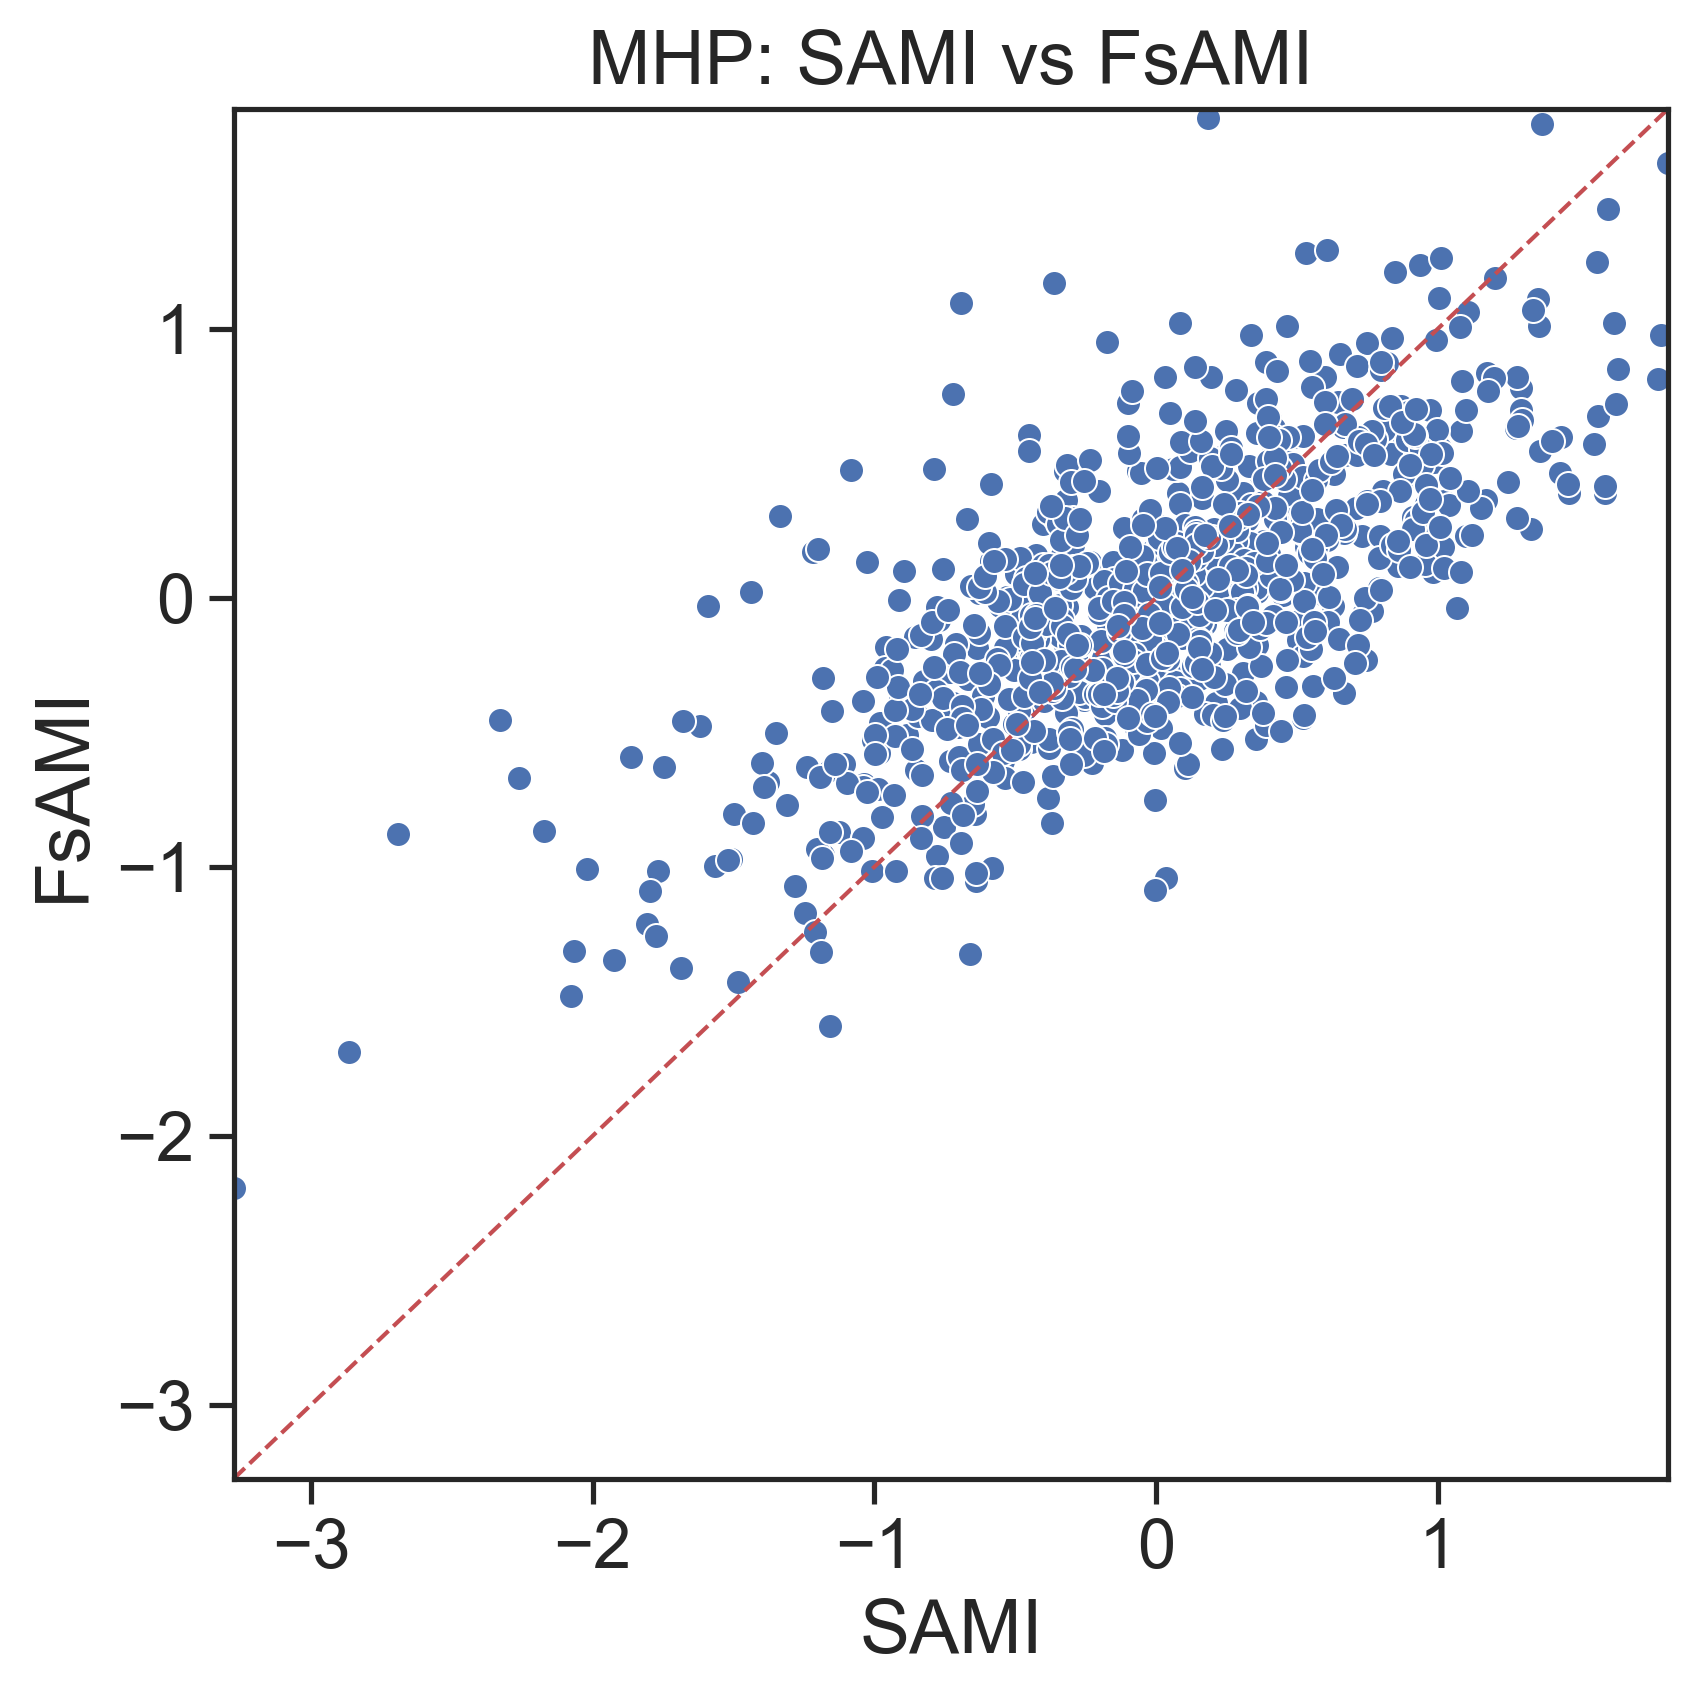

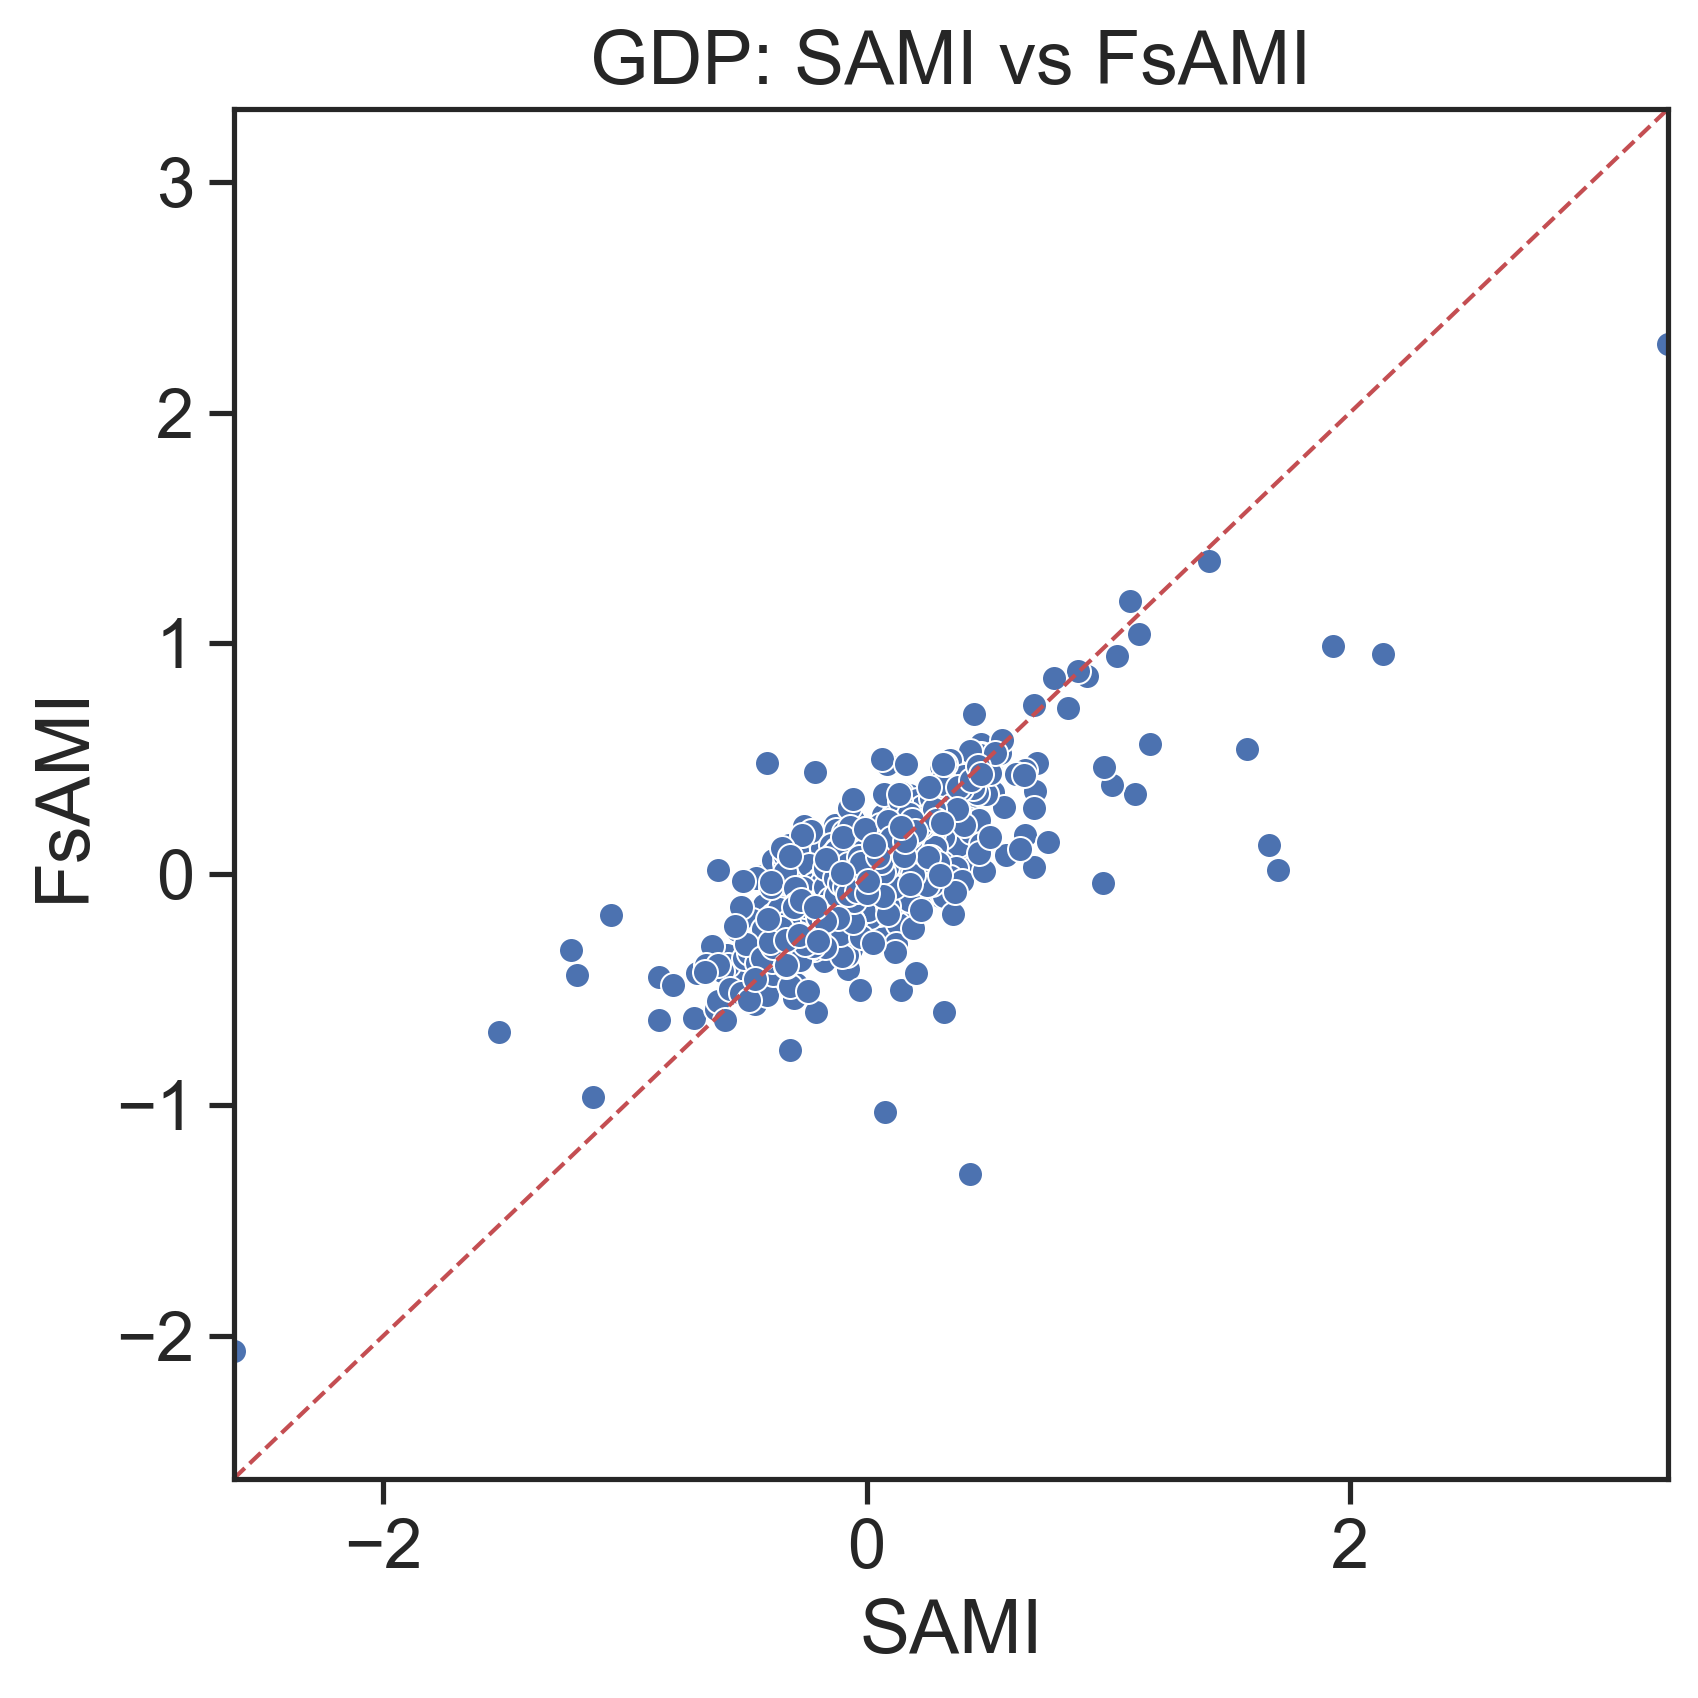

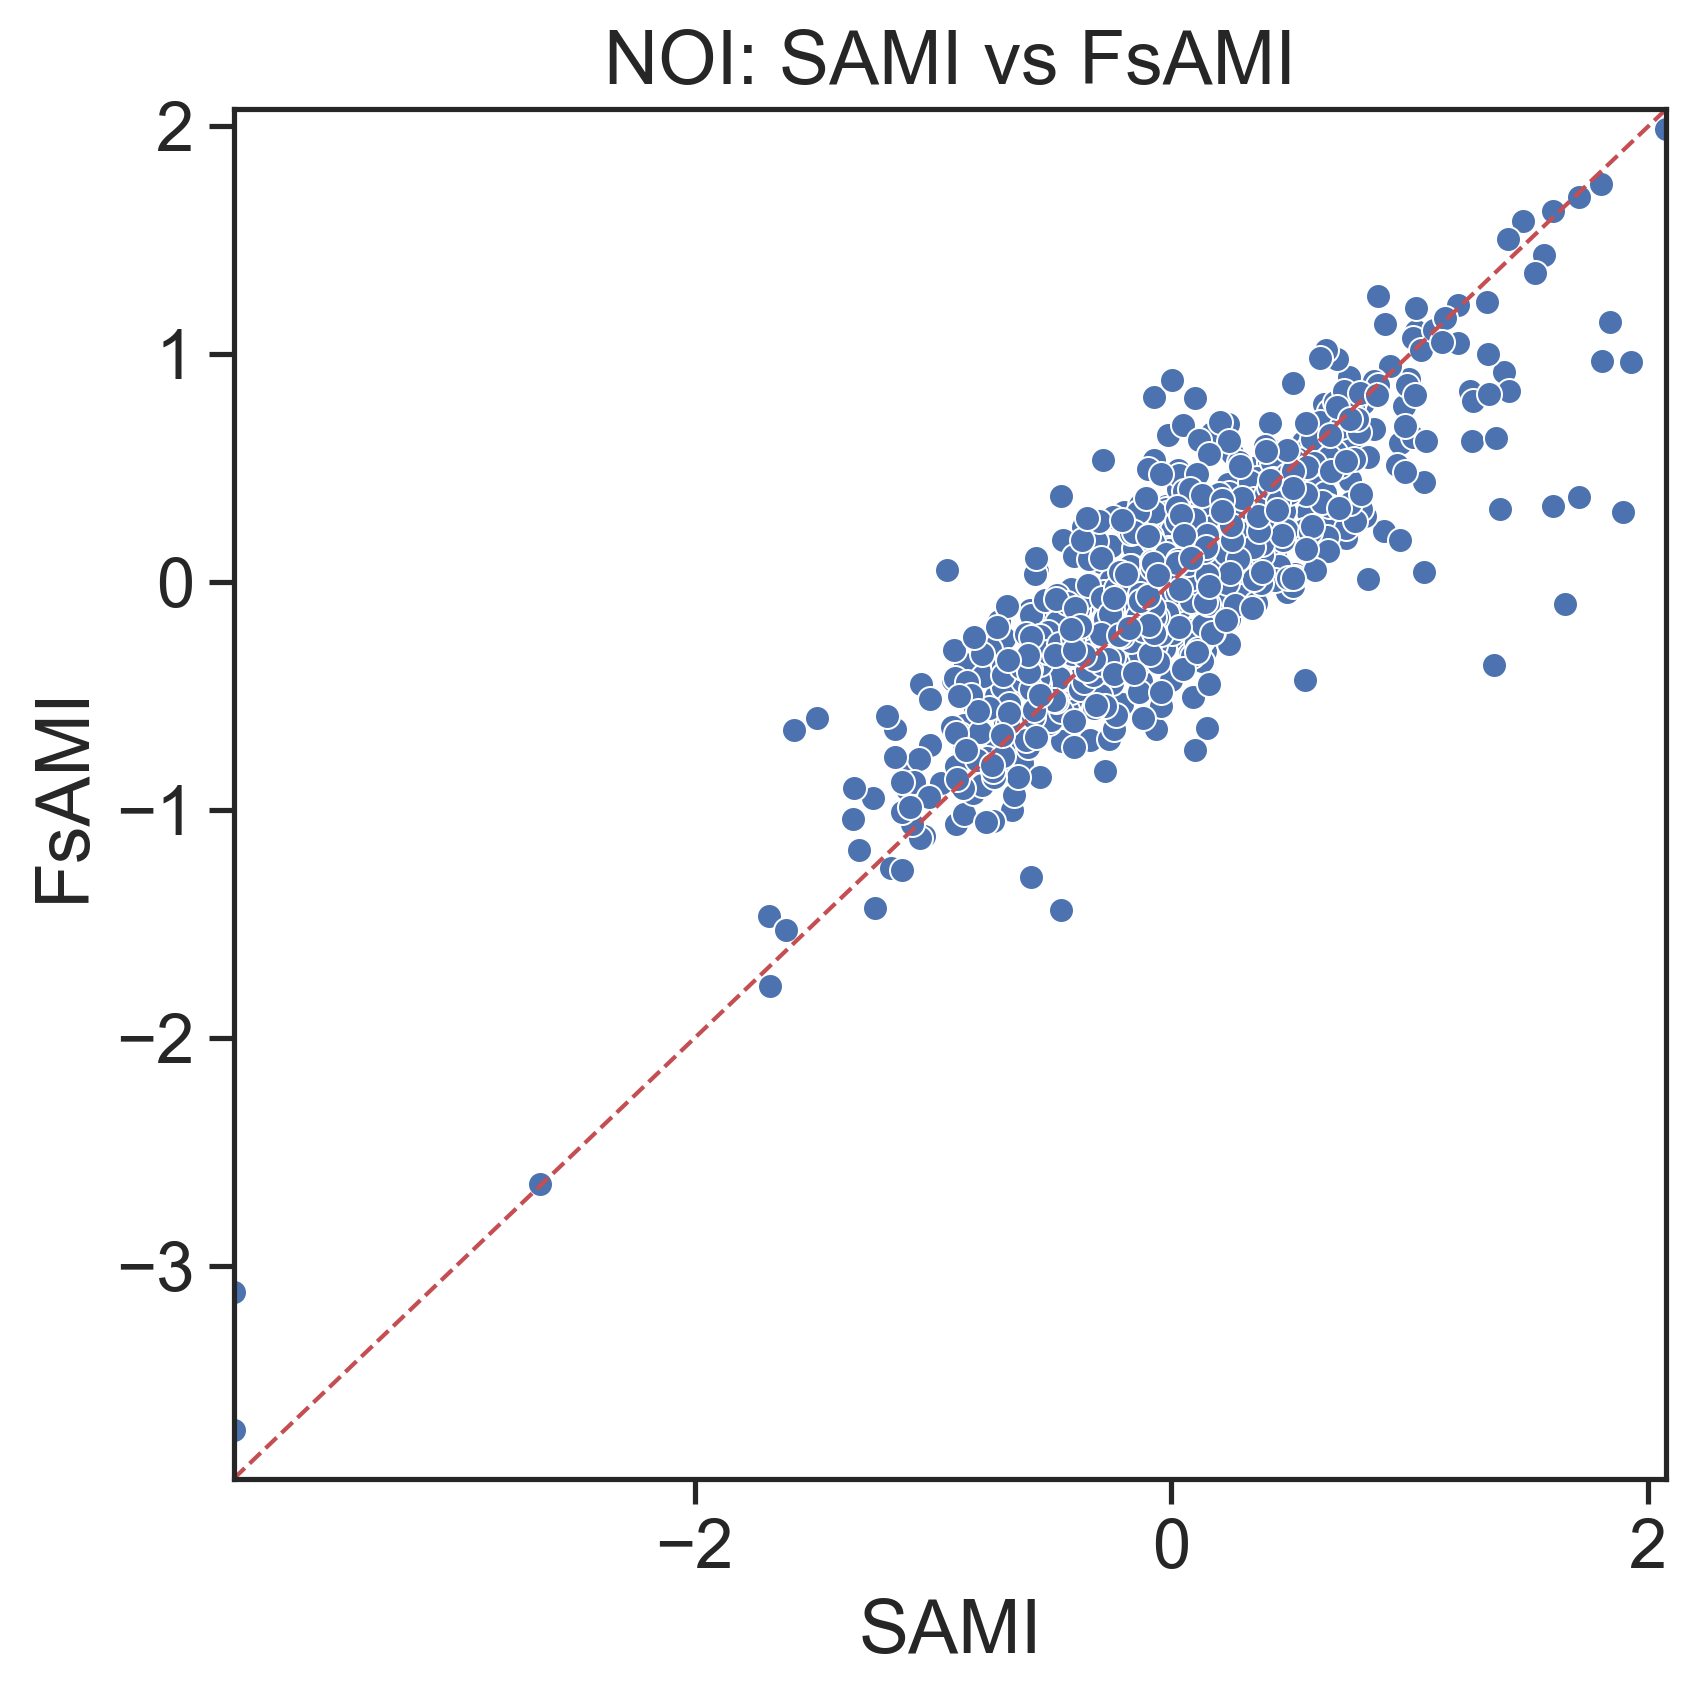

In [97]:
# Paths
m1_path = '../00_data/14_output/SAMIs_pop.csv'          
m2_path = '../00_data/14_output/FsAMIs_0903_pop_ko.csv'
m1_name = 'SAMI'
m2_name = 'FsAMI'

# Load
df1 = pd.read_csv(m1_path)
df2 = pd.read_csv(m2_path)

# Merge on cbsacode + factor
df = pd.merge(df1, df2, on=["cbsacode", "factor"])

df.loc[df['factor'] == 'gdp', 'factor'] = 'GDP'
df.loc[df['factor'] == 'mental_health_providers', 'factor'] = 'MHP'
df.loc[df['factor'] == 'DEPRESSION', 'factor'] = 'DEP'
df.loc[df['factor'] == 'noise50n', 'factor'] = 'NOI'
df.loc[df['factor'] == 'BINGE', 'factor'] = 'ED'
df.loc[df['factor'] == 'FFR20', 'factor'] = 'FFR'
df.loc[df['factor'] == 'LPA', 'factor'] = 'PI'
# Suppose you already have your factor list
# Example:
# my_factor = ["GDP", "DEP", "MHP", "NOI", "ED", "FFR", "PI"]

for fac in my_factor:
    dff = df[df["factor"] == fac]

    plt.figure(figsize=(6, 6))
    sns.scatterplot(
        data=dff, 
        x=m1_name, 
        y=m2_name
    )
    vmin = min(dff[m1_name].min(), dff[m2_name].min())
    vmax = max(dff[m1_name].max(), dff[m2_name].max())

    plt.plot([vmin, vmax], [vmin, vmax], "r--", lw=1)  # 1:1 line
    plt.xlim(vmin, vmax)
    plt.ylim(vmin, vmax)


    plt.xlabel(m1_name)
    plt.ylabel(m2_name)
    plt.title(f"{fac}: {m1_name} vs {m2_name}")

    plt.tight_layout()
    plt.show()

## Correlation and Distribution

In [98]:
df = pd.read_csv('../00_data/14_output/FsAMIs_0903_pop_ko.csv')
results_df = pd.read_csv('../00_data/14_output/population_rank.csv')

# Map long factor names to short labels (values, not column names)
df.loc[df['factor'] == 'gdp', 'factor'] = 'GDP'
df.loc[df['factor'] == 'mental_health_providers', 'factor'] = 'MHP'
df.loc[df['factor'] == 'DEPRESSION', 'factor'] = 'DEP'
df.loc[df['factor'] == 'noise50n', 'factor'] = 'NOI'
df.loc[df['factor'] == 'BINGE', 'factor'] = 'ED'
df.loc[df['factor'] == 'FFR20', 'factor'] = 'FFR'
df.loc[df['factor'] == 'LPA', 'factor'] = 'PI'

factors = ["DEP", "ED", "PI", "MHP", "GDP", "NOI"]

df_select = df.loc[df['factor'].isin(factors)]
dfp = df_select.pivot(index=["cbsacode"], columns="factor", values='FsAMI').reset_index()
dfp = dfp[['cbsacode'] + factors]
df_cleaned = dfp.dropna()
print(df_cleaned.shape)
df_raw = pd.read_csv("../00_data/13_final/cbsa_level.csv")
df_raw = df_raw.rename(columns={
    'gdp': 'GDP',
    'mental_health_providers': 'MHP',
    'DEPRESSION': 'DEP',
    'noise50n': 'NOI',
    'BINGE': 'ED',
    'FFR20': 'FFR',
    'LPA': 'PI'
})

# Drop missing values and isolate data matrix
df_cleaned = df_cleaned.merge(df_raw[['cbsacode','TotalPopulation']], on='cbsacode', how='left')
print(df_cleaned.shape)

# Data for plotting (factors + population kept for size mapping)
factor_cols = factors
df_plot = df_cleaned[['TotalPopulation'] + factor_cols].copy()
stat_map = {row["factor"]: (row["rho"], row["pval"]) 
            for _, row in results_df.iterrows()}

(874, 7)
(874, 8)


In [99]:
rho, p = spearmanr(df_cleaned['ED'],df_cleaned['DEP'])

In [100]:
rho

0.07296373609954963

/var/folders/xn/k3tchqyx5bn081b3tlx0k4940000gn/T/ipykernel_96522/880439866.py:90: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in cs.collections:
/var/folders/xn/k3tchqyx5bn081b3tlx0k4940000gn/T/ipykernel_96522/880439866.py:90: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in cs.collections:
/var/folders/xn/k3tchqyx5bn081b3tlx0k4940000gn/T/ipykernel_96522/880439866.py:90: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in cs.collections:
/var/folders/xn/k3tchqyx5bn081b3tlx0k4940000gn/T/ipykernel_96522/880439866.py:90: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in cs.collections:
/var/folders/xn/k3tchqyx5bn081b3tlx0k4940000gn/T/ipykernel_96522/880439866.py:90: Matplotlib

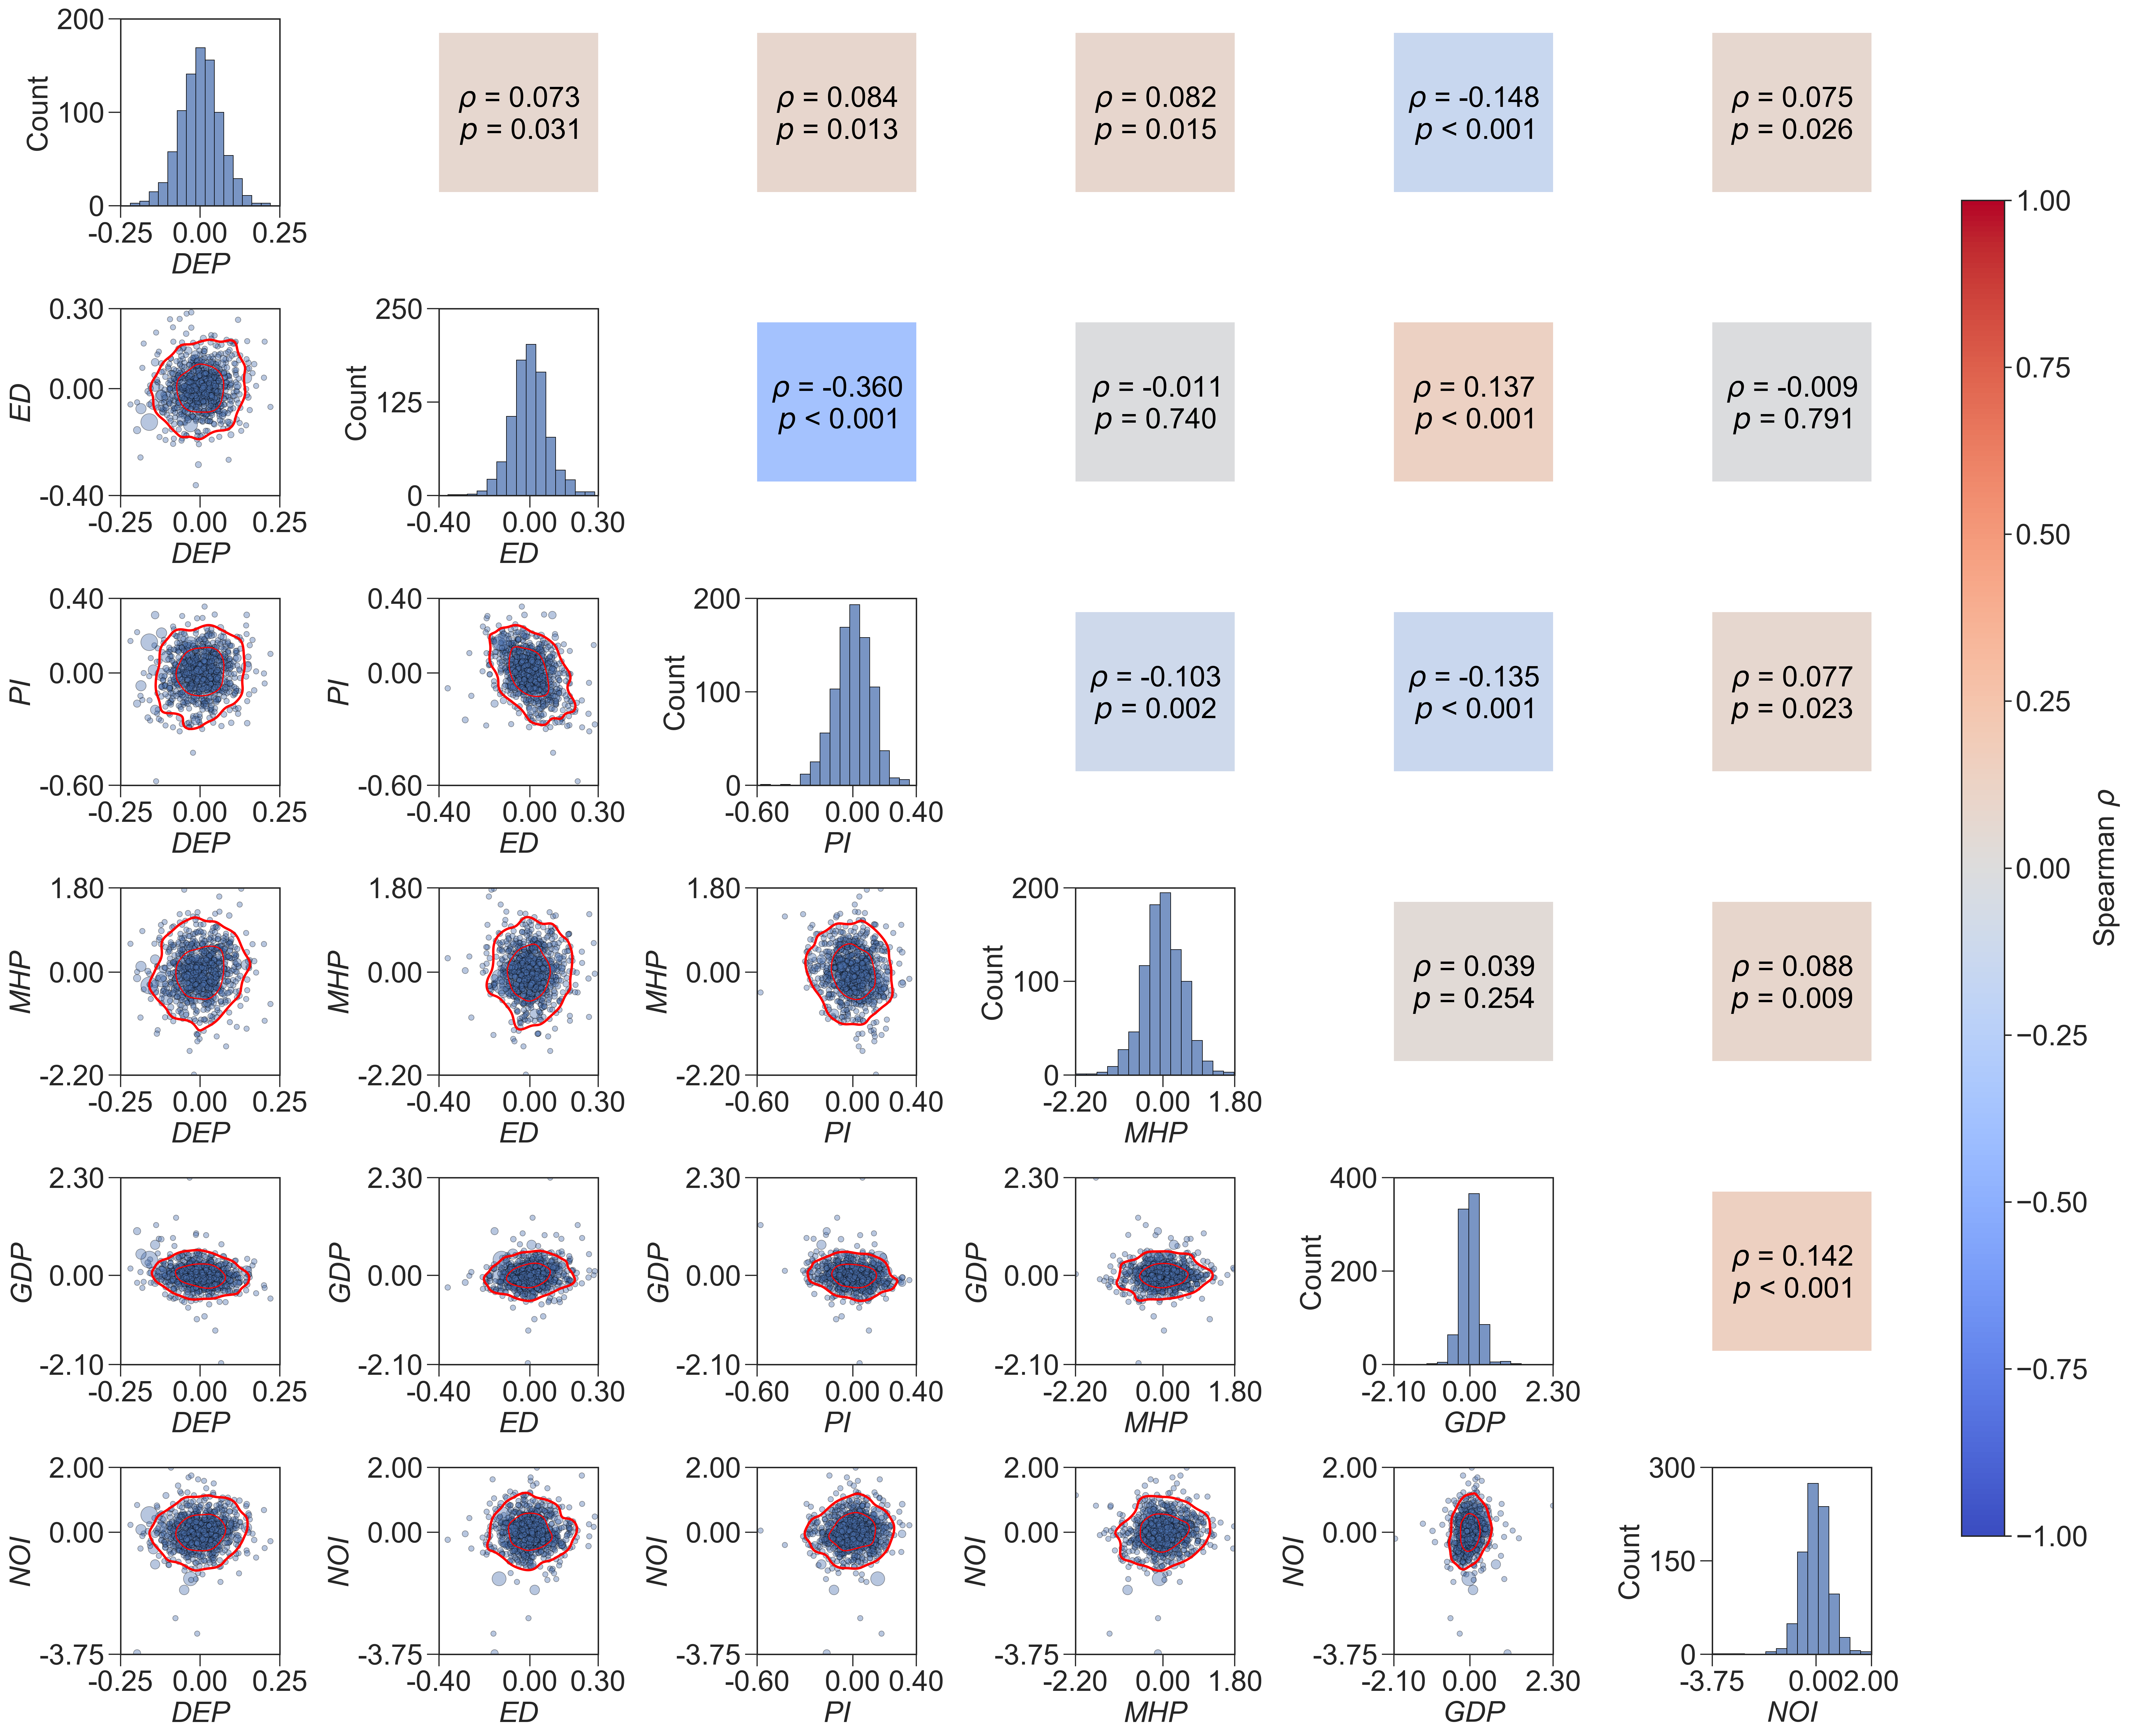

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from scipy.stats import spearmanr, gaussian_kde

# --- INPUTS ---
# df_plot: DataFrame with ['TotalPopulation'] + factor_cols
# factor_cols: e.g., ["DEP","ED","PI","MHP","GDP","NOI"]

sns.set_theme(style="ticks", font_scale=1.25)
plt.rc("font", family="Arial")
plt.rcParams.update({
    "figure.dpi": 300,
    "axes.linewidth": 1.2,          # crisp box edges
    "axes.autolimit_mode": "round_numbers",  # round to nice tick limits
    "axes.xmargin": 0,              # remove x padding
    "axes.ymargin": 0,              # remove y padding
    "xtick.direction": "out",
    "ytick.direction": "out",
    "axes.labelsize": 24,
})

# --- Scale point size by population ---
pop = df_plot["TotalPopulation"].astype(float)
pop_norm = (pop - pop.min()) / (pop.max() - pop.min() + 1e-12)
size_min, size_max = 20, 200   # adjust here
sizes_all = size_min + pop_norm * (size_max - size_min)

# --- Compute per-variable limits (for consistent scale per factor) ---
pad_frac = 0.06
var_stats = {}
for v in factor_cols:
    a = df_plot[v].to_numpy()
    m = np.isfinite(a)
    vmin, vmax = np.min(a[m]), np.max(a[m])
    span = vmax - vmin if vmax > vmin else 1.0
    var_stats[v] = dict(min=vmin, max=vmax, span=span, ctr=0.5 * (vmin + vmax))

# --- Modified equal_span_limits (use each variable’s own consistent range) ---
def equal_span_limits(vx, vy):
    """Return limits based only on each variable's fixed min/max range."""
    return (var_stats[vx]["min"], var_stats[vx]["max"]), (var_stats[vy]["min"], var_stats[vy]["max"])

def draw_quantile_contours(ax, x, y, quantiles=(0.5, 0.9), gridsize=200):
    import numpy as np
    from scipy.stats import gaussian_kde

    m = np.isfinite(x) & np.isfinite(y)
    if m.sum() < 10:
        return
    x, y = np.asarray(x)[m], np.asarray(y)[m]

    # use current visible limits
    xlim, ylim = ax.get_xlim(), ax.get_ylim()

    xi = np.linspace(xlim[0], xlim[1], gridsize)
    yi = np.linspace(ylim[0], ylim[1], gridsize)
    xx, yy = np.meshgrid(xi, yi)

    try:
        kde = gaussian_kde(np.vstack([x, y]))
    except Exception:
        return

    zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(gridsize, gridsize)

    dx = (xlim[1] - xlim[0]) / (gridsize - 1)
    dy = (ylim[1] - ylim[0]) / (gridsize - 1)
    area = dx * dy
    z_sorted = np.sort(zz.ravel())[::-1]
    cumsum = np.cumsum(z_sorted * area)
    total = cumsum[-1] if cumsum.size else 1.0

    def level_at(q):
        idx = np.searchsorted(cumsum, q * total, side="left")
        return z_sorted[min(idx, len(z_sorted) - 1)]

    qs = [q for q in quantiles if 0 < q < 1]
    if not qs:
        return

    levels = np.unique(np.sort([level_at(q) for q in qs])[::-1])
    if levels.size == 0:
        return

    lws = np.linspace(2.0, 1.0, num=len(levels))
    cs = ax.contour(xx, yy, zz, levels=levels, colors="red", linewidths=lws)
    for c in cs.collections:
        c.set_zorder(3)
        c.set_clip_on(True)

# --- Layout ---
n = len(factor_cols)
cell = 3
fig, axes = plt.subplots(n, n, figsize=(cell * n + 7, cell * n + 2.5))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# --- Spearman color map ---
cmap = plt.get_cmap("coolwarm")
norm = Normalize(vmin=-1, vmax=1)
sm = ScalarMappable(norm=norm, cmap=cmap)

for i in range(n):
    for j in range(n):
        ax = axes[i, j]
        xi, yi = factor_cols[j], factor_cols[i]

        
        if i == j:
            # --- Histogram ---
            sns.histplot(df_plot[yi], bins=15, edgecolor="black", linewidth=0.5, ax=ax)
            ax.grid(False)

            # --- Label (italic Arial) ---
            ax.set_xlabel(xi, fontsize=24, fontstyle='italic', fontfamily='Arial')
            ax.set_ylabel('Count', fontsize=24, fontfamily='Arial')

            # --- 数据范围 & 对齐到 0.05 倍数 ---
            xmin, xmax = np.nanmin(df_plot[yi]), np.nanmax(df_plot[yi])
            tick_min = np.floor(xmin / 0.05) * 0.05
            tick_max = np.ceil(xmax / 0.05) * 0.05
            if tick_max == tick_min:
                tick_min -= 0.05
                tick_max += 0.05

            # --- 留白 ---
            span = tick_max - tick_min
            pad = 0
            ax.set_xlim(tick_min - pad, tick_max + pad)

            # --- 三个刻度：最小、中间、最大 ---
            xticks = [tick_min, 0.0, tick_max] if tick_min < 0 < tick_max else np.linspace(tick_min, tick_max, 3)
            ax.set_xticks(xticks)
            ax.set_xticklabels([f"{t:.2f}" for t in xticks], fontsize=24)

            # --- y轴 ---
            ymin, ymax = ax.get_ylim()
            ytick_min = 0
            ytick_max = np.ceil(ymax / 10) * 10
            ypad = 0
            ax.set_ylim(ytick_min - ypad, ytick_max + ypad)
            yticks = np.linspace(ytick_min, ytick_max, 3)
            ax.set_yticks(yticks)
            ax.set_yticklabels([f"{t:.0f}" for t in yticks], fontsize=24)

            ax.tick_params(axis="both", which="both", direction="out", length=10, width=1.0, labelsize=24)
            

        elif i > j:
            x = df_plot[xi].to_numpy()
            y = df_plot[yi].to_numpy()
            m = np.isfinite(x) & np.isfinite(y)
            x, y, s = x[m], y[m], sizes_all[m]

            # --- X轴: 对齐到 0.05 倍数 + 留白 ---
            xmin, xmax = np.min(x), np.max(x)
            x_tick_min = np.floor(xmin / 0.05) * 0.05
            x_tick_max = np.ceil(xmax / 0.05) * 0.05
            if x_tick_max == x_tick_min:
                x_tick_min -= 0.05
                x_tick_max += 0.05
            x_span = x_tick_max - x_tick_min
            x_pad = 0
            ax.set_xlim(x_tick_min - x_pad, x_tick_max + x_pad)

            if x_tick_min < 0 < x_tick_max:
                xticks = [x_tick_min, 0.0, x_tick_max]
            else:
                xticks = np.linspace(x_tick_min, x_tick_max, 3)
            ax.set_xticks(xticks)
            ax.set_xticklabels([f"{t:.2f}" for t in xticks], fontsize=24)

            # --- Y轴: 对齐到 0.05 倍数 + 留白 ---
            ymin, ymax = np.min(y), np.max(y)
            y_tick_min = np.floor(ymin / 0.05) * 0.05
            y_tick_max = np.ceil(ymax / 0.05) * 0.05
            if y_tick_max == y_tick_min:
                y_tick_min -= 0.05
                y_tick_max += 0.05
            y_span = y_tick_max - y_tick_min
            y_pad = 0
            ax.set_ylim(y_tick_min - y_pad, y_tick_max + y_pad)

            if y_tick_min < 0 < y_tick_max:
                yticks = [y_tick_min, 0.0, y_tick_max]
            else:
                yticks = np.linspace(y_tick_min, y_tick_max, 3)
            ax.set_yticks(yticks)
            ax.set_yticklabels([f"{t:.2f}" for t in yticks], fontsize=24)

            # --- scatter + contours ---
            ax.scatter(x, y, s=s, alpha=0.4, edgecolor="black", linewidths=0.5)
            draw_quantile_contours(ax, x, y, quantiles=(0.5, 0.9), gridsize=220)

            ax.grid(False)
            ax.set_xlabel(xi, fontsize=24, fontstyle='italic', fontfamily='Arial')
            ax.set_ylabel(yi, fontsize=24, fontstyle='italic', fontfamily='Arial')
            ax.tick_params(axis="both", which="both", direction="out", length=10, width=1.0, labelsize=24)


        else:
            # Upper triangle: Spearman correlation tile
            x = df_plot[xi].to_numpy()
            y = df_plot[yi].to_numpy()
            m = np.isfinite(x) & np.isfinite(y)

            rho, p = spearmanr(x[m], y[m])

            ax.imshow([[rho]], extent=[0, 1, 0, 1], cmap=cmap, norm=norm, aspect="equal")

            # text
            rho_txt = rf"$\rho$ = {rho:.3f}" if np.isfinite(rho) else r"$\rho$ = --"
            if np.isfinite(p) and p < 1e-3:
                p_txt = r"$p$ < 0.001" 
            else:
                p_txt = rf"$p$ = {p:.3f}" if np.isfinite(p) else r"$p$ = --"

            ax.text(0.5, 0.58, rho_txt, ha="center", va="center",
                    fontsize=24, color="black", transform=ax.transAxes)
            ax.text(0.5, 0.38, p_txt, ha="center", va="center",
                    fontsize=24, color="black", transform=ax.transAxes)

            ax.set_xticks([]); ax.set_yticks([])
            for s in ax.spines.values():
                s.set_visible(False)
            if i == n - 1: ax.set_xlabel(xi)
            if j == 0: ax.set_ylabel(yi)

# --- Colorbar ---
cax = fig.add_axes([0.92, 0.12, 0.02, 0.76])
cb = fig.colorbar(sm, cax=cax)
cb.ax.tick_params(labelsize=24)
cb.set_label(rf"Spearman $\rho$",fontsize=24)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig("scatter.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Moran's I

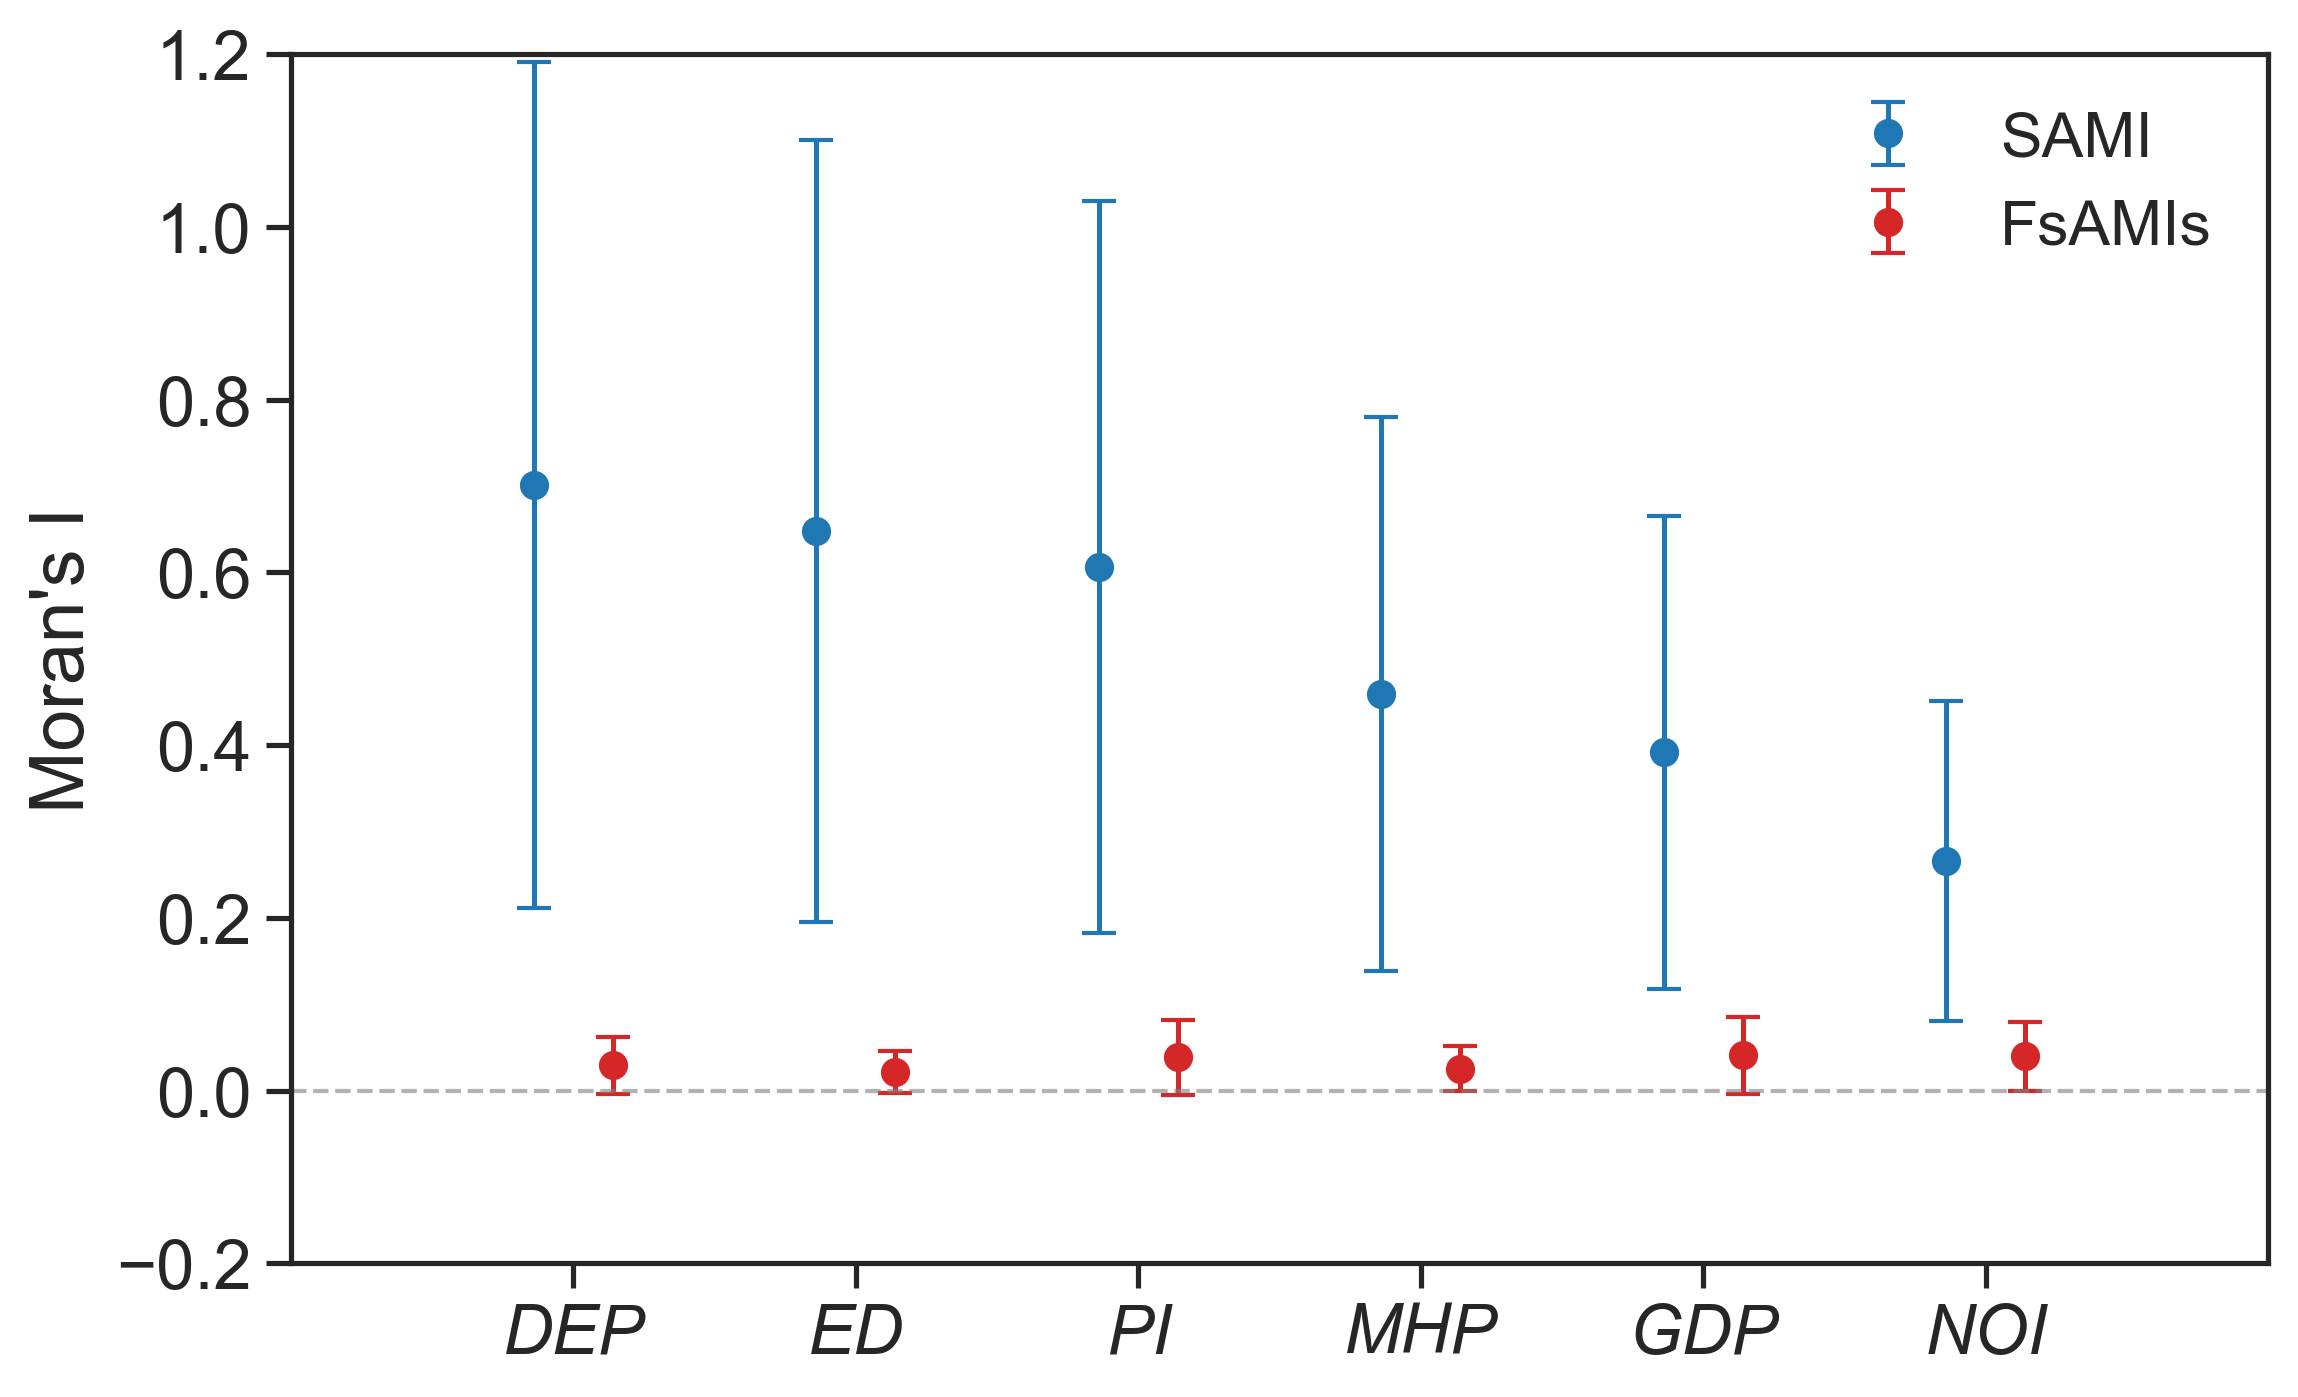

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

df = pd.read_csv('../00_data/14_output/FsAMIs_0903_pop_ko.csv')

df.loc[df['factor'] == 'gdp', 'factor'] = 'GDP'
df.loc[df['factor'] == 'mental_health_providers', 'factor'] = 'MHP'
df.loc[df['factor'] == 'DEPRESSION', 'factor'] = 'DEP'
df.loc[df['factor'] == 'noise50n', 'factor'] = 'NOI'
df.loc[df['factor'] == 'BINGE', 'factor'] = 'ED'
df.loc[df['factor'] == 'FFR20', 'factor'] = 'FFR'
df.loc[df['factor'] == 'LPA', 'factor'] = 'PI'

df_models = df.loc[df['factor'].isin(factors)].drop(columns=['FsAMI','cbsacode']).drop_duplicates().reset_index(drop=True)


df_plot = df_models.loc[df_models['factor'].isin(factors)].copy()
df_plot['factor'] = pd.Categorical(df_plot['factor'], categories=factors, ordered=True)
df_plot = df_plot.sort_values('factor')

# Derive 95% CI half-widths from p-values (two-sided normal approx around 0)
def ci_half_from_p(value, p, alpha=0.05):
    if pd.isna(value) or pd.isna(p) or p <= 0:
        p = 1e-16  # avoid inf
    z_obs = norm.isf(p/2.0)          # z such that P(|Z|>=z)=p
    se    = abs(value) / z_obs       # value ≈ z_obs * se  (testing against 0)
    z95   = norm.ppf(1 - alpha/2.0)  # 1.96
    return z95 * se

df_plot['baseline_ci'] = df_plot.apply(
    lambda r: ci_half_from_p(r['baseline_moran_value'], r['baseline_moran_p']), axis=1
)
df_plot['final_ci'] = df_plot.apply(
    lambda r: ci_half_from_p(r['final_moran_value'], r['final_moran_p']), axis=1
)

# ---- PLOT ----
sns.set_theme(style="ticks", font_scale=1.5)
fig, ax = plt.subplots(figsize=(8, 5))

x = np.arange(len(factors))
width = 0.28

ax.errorbar(
    x - width/2,
    df_plot['baseline_moran_value'],
    yerr=df_plot['baseline_ci'],
    fmt='o', capsize=4, elinewidth=1.2, linewidth=0,
    label="SAMI", color='tab:blue'
)
ax.errorbar(
    x + width/2,
    df_plot['final_moran_value'],
    yerr=df_plot['final_ci'],
    fmt='o', capsize=4, elinewidth=1.2, linewidth=0,
    label="FsAMIs", color='tab:red'
)

# zero reference
ax.axhline(0, color='gray', linewidth=1, linestyle='--', alpha=0.6)

ax.set_xticks(x)
ax.set_xticklabels(factors, fontstyle="italic")
ax.set_ylabel("Moran's I")
ax.legend(loc="upper right", frameon=False, fontsize=15) 
plt.tight_layout()
plt.show()

In [ ]:
df_models

factor  best_k  baseline_moran_value  baseline_moran_p  final_moran_value  \
0     ED      12              0.647656             0.005           0.021401   
1    DEP       9              0.701234             0.005           0.029164   
2     PI       5              0.606606             0.005           0.038697   
3    MHP      11              0.459386             0.005           0.025334   
4    GDP       5              0.391563             0.005           0.040877   
5    NOI       6              0.265583             0.005           0.039752   

   final_moran_p  selected_m_eigs      beta  p_value  CI_lower  CI_upper  \
0          0.083               42  1.019515      0.0  1.014879  1.024150   
1          0.079               66  0.993780      0.0  0.989925  0.997635   
2          0.079               52  0.957922      0.0  0.951126  0.964718   
3          0.058               34  1.151497      0.0  1.123054  1.179941   
4          0.071               28  1.086026      0.0  1.070358  1.101695   
5          0.050               22  1.211661      0.0  1.182870  1.240452   

           AIC  
0 -1833.959834  
1 -2188.492209  
2 -1196.830248  
3  1346.769538  
4   302.950580  
5  1396.456897